![AIcrowd-Logo](https://raw.githubusercontent.com/AIcrowd/AIcrowd/master/app/assets/images/misc/aicrowd-horizontal.png)


# Getting Started Code for [Chess Pieces](https://www.aicrowd.com/challenges/ai-blitz-6/problems/chess-pieces) on AIcrowd
#### Author : Shubhamai

## Download Necessary Packages 📚

In this baseline we are going to use FastAI as our main library to train out model and making & submitting predictions

In [1]:
!pip install --upgrade fastai git+https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli.git >/dev/null
%load_ext aicrowd.magic

  Running command git clone -q https://gitlab.aicrowd.com/yoogottamk/aicrowd-cli.git /tmp/pip-req-build-qwtpbzpp


## Download Data
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [2]:
API_KEY = '' #Please enter your API Key [https://www.aicrowd.com/participants/me]
%aicrowd login --api-key $API_KEY

Verifying API Key...


Invalid API Key provided


In [3]:
%aicrowd dataset download --challenge chess-pieces -j 3

In [4]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/ 
!unzip val.zip -d data/ 
!unzip test.zip  -d data/ 

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

Streaming output truncated to the last 5000 lines.
  inflating: data/test/5499.jpg      
  inflating: data/test/55.jpg        
  inflating: data/test/550.jpg       
  inflating: data/test/5500.jpg      
  inflating: data/test/5501.jpg      
  inflating: data/test/5502.jpg      
  inflating: data/test/5503.jpg      
  inflating: data/test/5504.jpg      
  inflating: data/test/5505.jpg      
  inflating: data/test/5506.jpg      
  inflating: data/test/5507.jpg      
  inflating: data/test/5508.jpg      
  inflating: data/test/5509.jpg      
  inflating: data/test/551.jpg       
  inflating: data/test/5510.jpg      
  inflating: data/test/5511.jpg      
  inflating: data/test/5512.jpg      
  inflating: data/test/5513.jpg      
  inflating: data/test/5514.jpg      
  inflating: data/test/5515.jpg      
  inflating: data/test/5516.jpg      
  inflating: data/test/5517.jpg      
  inflating: data/test/5518.jpg      
  inflating: data/test/5519.jpg      
  inflating: data/test/552.jpg       


## Import packages

In [5]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [6]:
train_df = pd.read_csv("data/train.csv")

## Visualize the data 👀

In [7]:
train_df

,ImageID,label
0,0,black
1,1,white
2,2,black
3,3,black
4,4,black
...,...,...
39995,39995,black
39996,39996,white
39997,39997,black
39998,39998,white


In [8]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,black
1,1.jpg,white
2,2.jpg,black
3,3.jpg,black
4,4.jpg,black
...,...,...
39995,39995.jpg,black
39996,39996.jpg,white
39997,39997.jpg,black
39998,39998.jpg,white


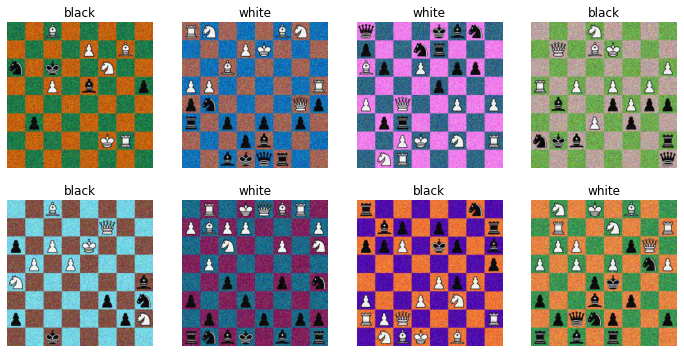

In [9]:
dls = ImageDataLoaders.from_df(train_df, path="data/train", bs=8)
dls.show_batch()

# TRAINING PHASE 🏋️

In [10]:
learn = cnn_learner(dls, alexnet, metrics=F1Score())

## Train the Model

In [11]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,f1_score,time
0,0.770929,0.716717,0.513331,01:50


epoch,train_loss,valid_loss,f1_score,time
0,0.646784,0.612306,0.658084,02:01
1,0.548850,0.514566,0.764504,02:01
2,0.510853,0.532183,0.783200,02:01
3,0.372288,0.354120,0.855815,02:01
4,0.319362,0.490033,0.810922,02:01
5,0.263133,0.179451,0.931300,02:01
6,0.265085,0.153103,0.947227,02:01
7,0.262084,0.145793,0.952716,02:01
8,0.200943,0.129096,0.952839,02:01
9,0.160635,0.093257,0.972226,02:01


# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.# Prediction on Evaluation Set

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [12]:
test_imgs_name = get_image_files("data/test")
test_dls = dls.test_dl(test_imgs_name)

label_to_class_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(label_to_class_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'black', 1: 'white'}


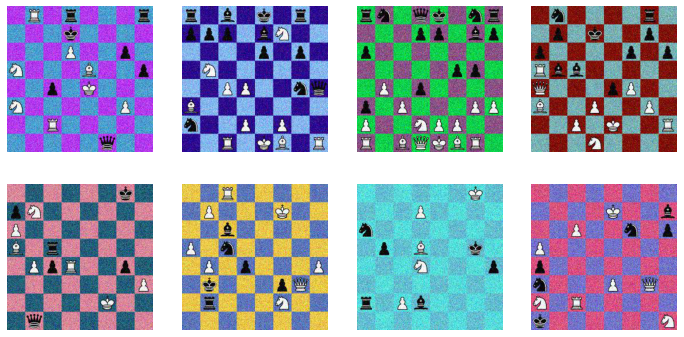

In [13]:
test_dls.show_batch()

In [14]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [label_to_class_mapping[i] for i in results.numpy()]

## Save the prediction to csv

In [15]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

,ImageID,label
0,166,black
1,6075,white
2,4211,white
3,1773,white
4,2531,black
...,...,...
9995,1457,black
9996,2914,white
9997,1475,black
9998,1316,white


### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [16]:
submission.to_csv("submission.csv", index=False)

## To download the generated csv in colab run the below command.

In [17]:
try:
    from google.colab import files
    files.download('submission.csv') 
except:
    print("Option Only avilable in Google Colab")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Well Done! 👍 We are all set to make a submission and see your name on leaderborad. Let navigate to [challenge page](https://www.aicrowd.com/challenges/chess-pieces) and make one.